In [19]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd

# Set the base path
base_path = '/content/drive/MyDrive/data_sets/'

# Load each CSV
train_df = pd.read_csv(base_path + 'train.csv')
test_df = pd.read_csv(base_path + 'test.csv')
sample_df = pd.read_csv(base_path + 'sample_submission.csv')

# Check the first few rows of one file
train_df.head()


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


# **1. Data Cleaning**

In [25]:
import numpy as np

# Convert release_date to datetime
train_df['release_date'] = pd.to_datetime(train_df['release_date'], format='%m/%d/%y', errors='coerce')

# Fill missing values in 'budget' and 'revenue' with 0
train_df['budget'] = train_df['budget'].fillna(0)
train_df['revenue'] = train_df['revenue'].fillna(0)

# Drop rows with missing runtime or release_date
train_df.dropna(subset=['runtime', 'release_date'], inplace=True)

# Remove duplicates (if any)
train_df.drop_duplicates(inplace=True)


# **2. Basic Filtering and Analysis**

In [26]:
# Movies with a budget over $100 million
high_budget_movies = train_df[train_df['budget'] > 1e8]

# Top 10 movies by revenue
top_revenue = train_df.sort_values(by='revenue', ascending=False).head(10)

# Average runtime by language
avg_runtime_by_lang = train_df.groupby('original_language')['runtime'].mean()


# **3. Feature Engineering**

In [27]:
# Create a new column: profit
train_df['profit'] = train_df['revenue'] - train_df['budget']

# Extract release year
train_df['release_year'] = train_df['release_date'].dt.year


# **4. Visualizations with Matplotlib & Seaborn**

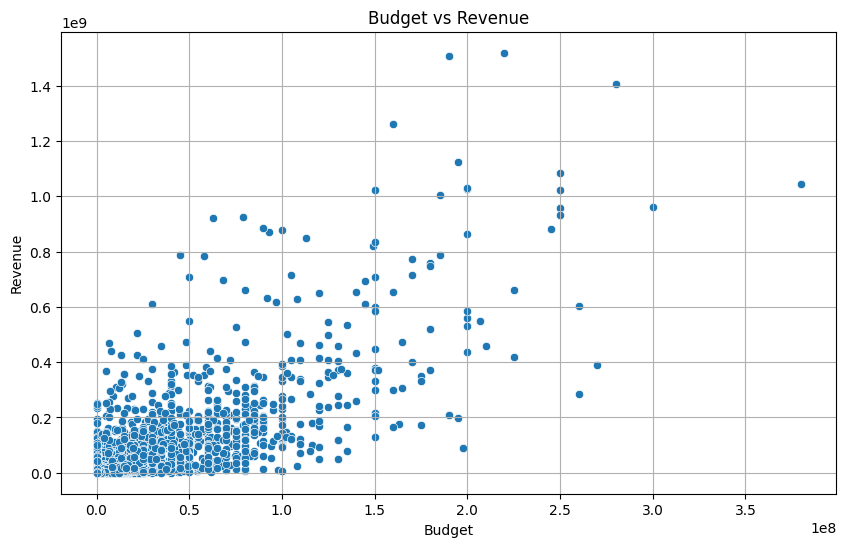

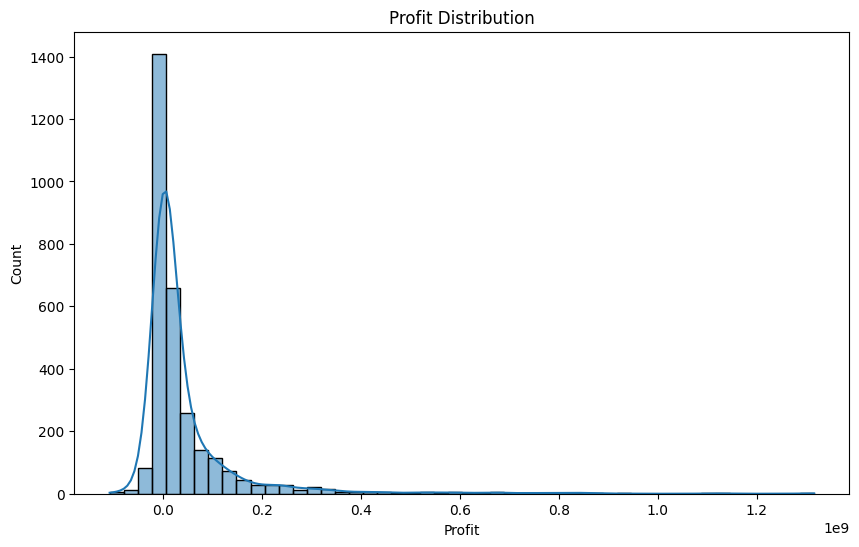

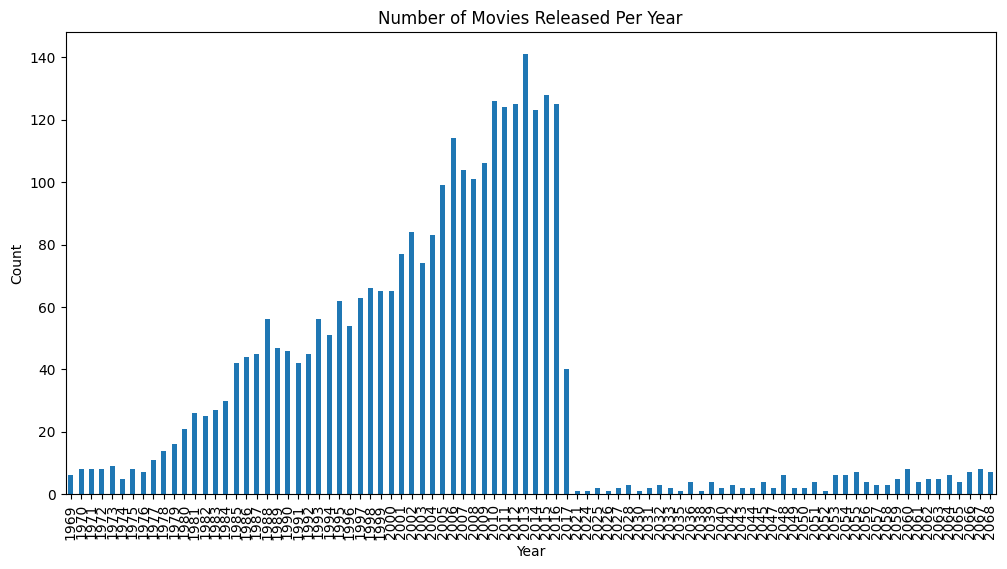

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Revenue vs Budget scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=train_df, x='budget', y='revenue')
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# Profit distribution
plt.figure(figsize=(10,6))
sns.histplot(train_df['profit'], bins=50, kde=True)
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.show()

# Number of movies released per year
plt.figure(figsize=(12,6))
train_df['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


# **5. Correlation and Insights**

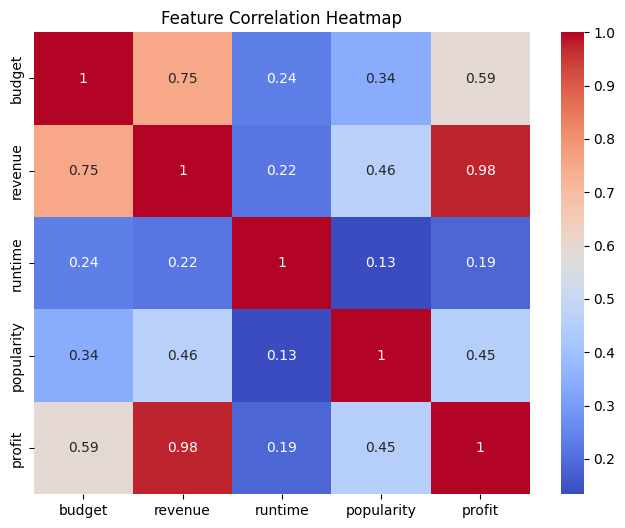

In [29]:
# Correlation matrix
corr_matrix = train_df[['budget', 'revenue', 'runtime', 'popularity', 'profit']].corr()

# Heatmap of correlations
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


# **6. Parse JSON-like Strings**

In [63]:
import ast

# Safely convert string to Python objects (lists of dicts)
def parse_json_column(df, column):
    return df[column].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Apply to the relevant columns
train_df['genres'] = parse_json_column(train_df, 'genres')
train_df['cast'] = parse_json_column(train_df, 'cast')
train_df['crew'] = parse_json_column(train_df, 'crew')


ValueError: malformed node or string: [{'id': 35, 'name': 'Comedy'}]

# **7. Extract Genre Names**

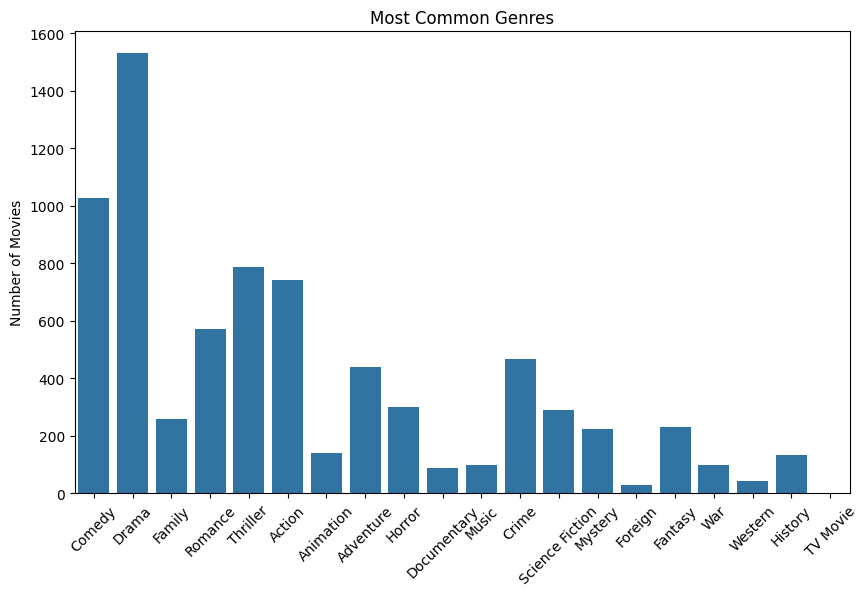

In [34]:
# Get a list of all genre names from the 'genres' column
train_df['genre_names'] = train_df['genres'].apply(lambda x: [i['name'] for i in x])

# Flatten the list of genres for all movies
from collections import Counter
genre_list = sum(train_df['genre_names'], [])
genre_counts = Counter(genre_list)

# Plot top genres
plt.figure(figsize=(10,6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.xticks(rotation=45)
plt.title('Most Common Genres')
plt.ylabel('Number of Movies')
plt.show()


# **8. Most Frequent Actors (Top Billed)**

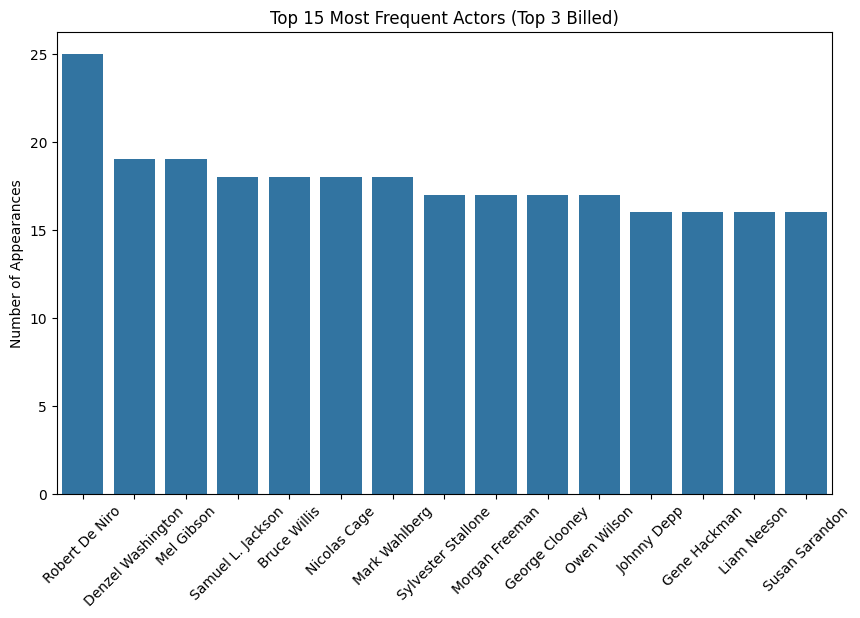

In [35]:
# Extract first 3 cast members
train_df['top_actors'] = train_df['cast'].apply(lambda x: [i['name'] for i in x[:3]])

# Flatten and count
actor_list = sum(train_df['top_actors'], [])
actor_counts = Counter(actor_list).most_common(15)

# Plot
actors, counts = zip(*actor_counts)
plt.figure(figsize=(10,6))
sns.barplot(x=list(actors), y=list(counts))
plt.xticks(rotation=45)
plt.title('Top 15 Most Frequent Actors (Top 3 Billed)')
plt.ylabel('Number of Appearances')
plt.show()


# **9. Most Frequent Directors**

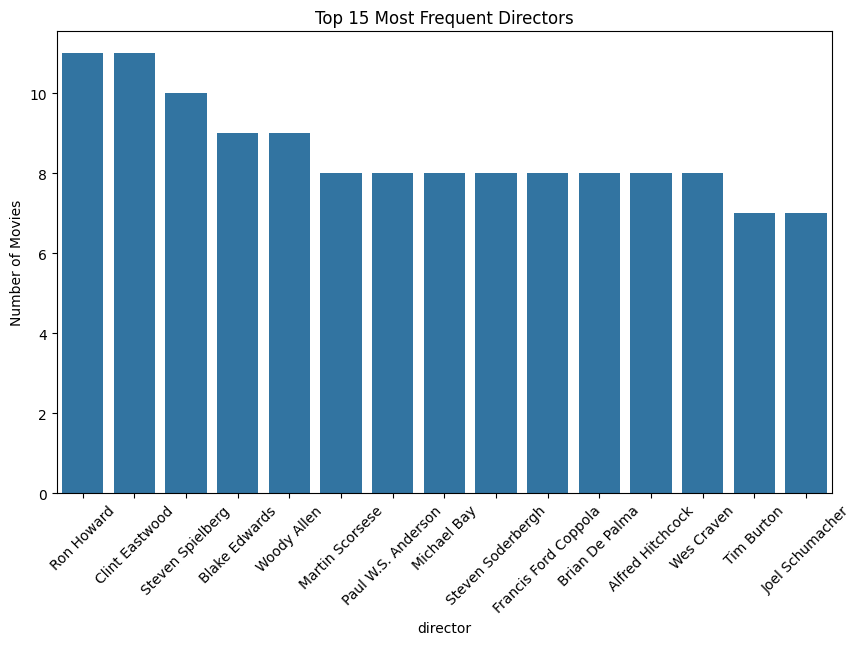

In [36]:
# Extract directors from the crew list
def get_director(crew_list):
    for person in crew_list:
        if person.get('job') == 'Director':
            return person.get('name')
    return None

train_df['director'] = train_df['crew'].apply(get_director)

# Count and plot
director_counts = train_df['director'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=director_counts.index, y=director_counts.values)
plt.xticks(rotation=45)
plt.title('Top 15 Most Frequent Directors')
plt.ylabel('Number of Movies')
plt.show()


# **10. Keyword Analysis**

In [37]:
# Convert 'Keywords' column to list of keyword names
train_df['keywords'] = parse_json_column(train_df, 'Keywords')
train_df['keyword_names'] = train_df['keywords'].apply(lambda x: [i['name'] for i in x])


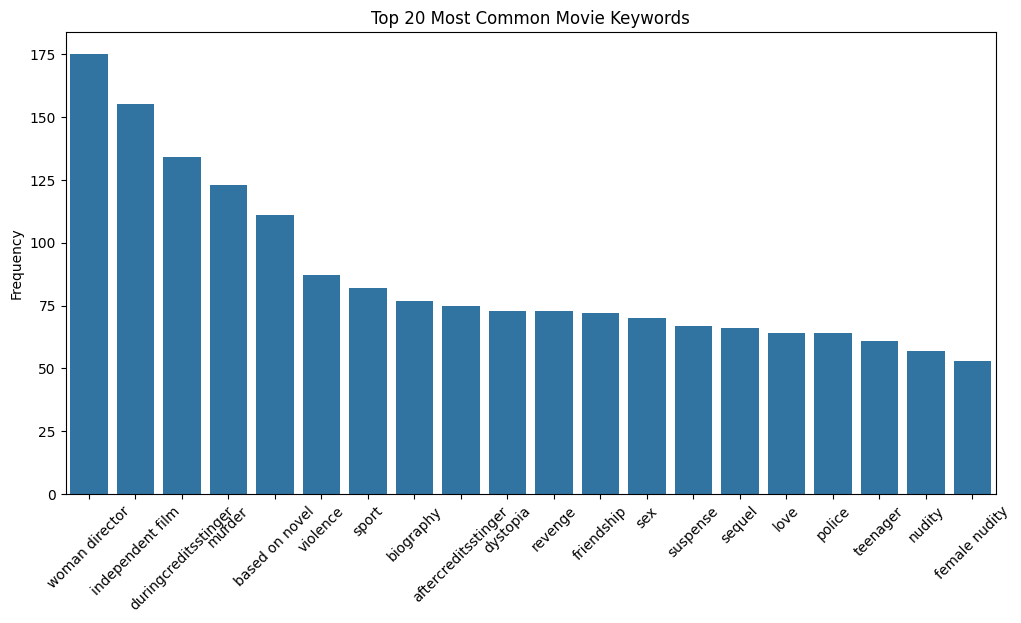

In [38]:
# Flatten and count keywords
keyword_list = sum(train_df['keyword_names'], [])
keyword_counts = Counter(keyword_list).most_common(20)

# Plot top keywords
keywords, counts = zip(*keyword_counts)
plt.figure(figsize=(12,6))
sns.barplot(x=list(keywords), y=list(counts))
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Movie Keywords')
plt.ylabel('Frequency')
plt.show()


# **🌐 11. Language-Based Trends**

### **Top Languages by Number of Movies**

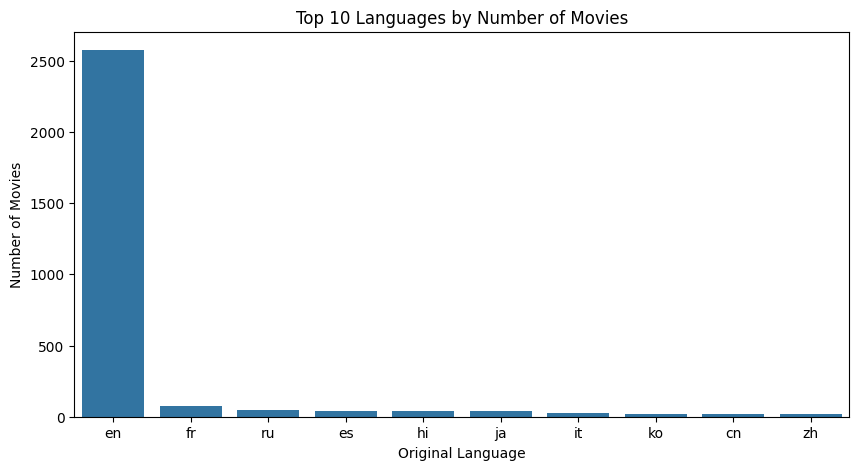

In [39]:
language_counts = train_df['original_language'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title('Top 10 Languages by Number of Movies')
plt.ylabel('Number of Movies')
plt.xlabel('Original Language')
plt.show()


### **Average Revenue and Budget by Language**

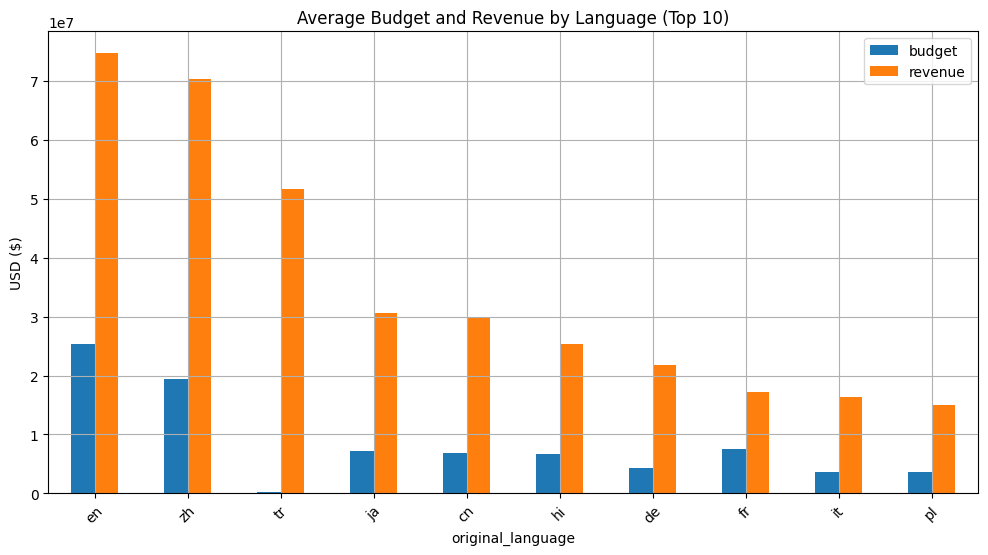

In [40]:
lang_stats = train_df.groupby('original_language')[['budget', 'revenue']].mean().sort_values(by='revenue', ascending=False).head(10)

lang_stats.plot(kind='bar', figsize=(12,6))
plt.title('Average Budget and Revenue by Language (Top 10)')
plt.ylabel('USD ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### **Profitability by Genre**

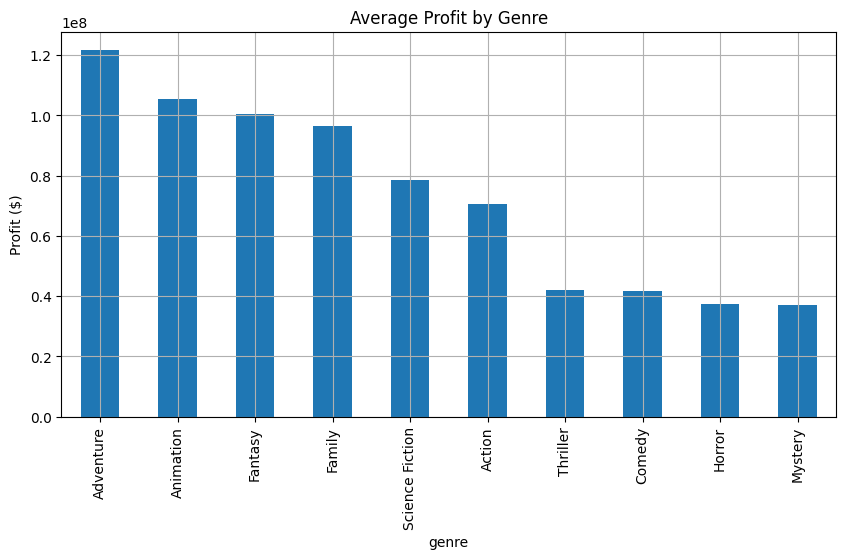

In [41]:
# Create DataFrame with each genre as a row
genre_profit = []

for _, row in train_df.iterrows():
    for genre in row['genre_names']:
        genre_profit.append({'genre': genre, 'profit': row['profit']})

genre_profit_df = pd.DataFrame(genre_profit)

# Group and analyze
avg_profit_by_genre = genre_profit_df.groupby('genre')['profit'].mean().sort_values(ascending=False).head(10)

# Plot
avg_profit_by_genre.plot(kind='bar', figsize=(10,5), title='Average Profit by Genre')
plt.ylabel('Profit ($)')
plt.grid(True)
plt.show()


# **12. Time-Based Trends**

### **A. Number of Movies Released Per Year**

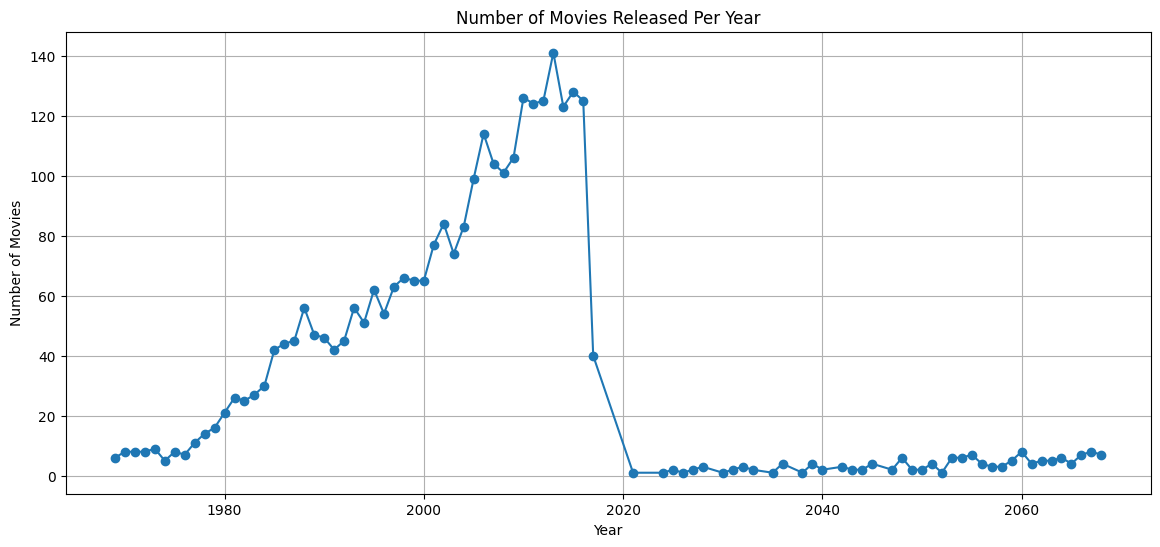

In [42]:
movies_per_year = train_df['release_year'].value_counts().sort_index()

plt.figure(figsize=(14,6))
movies_per_year.plot(kind='line', marker='o')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


### **B. Average Budget and Revenue Over Time**

<Figure size 1400x600 with 0 Axes>

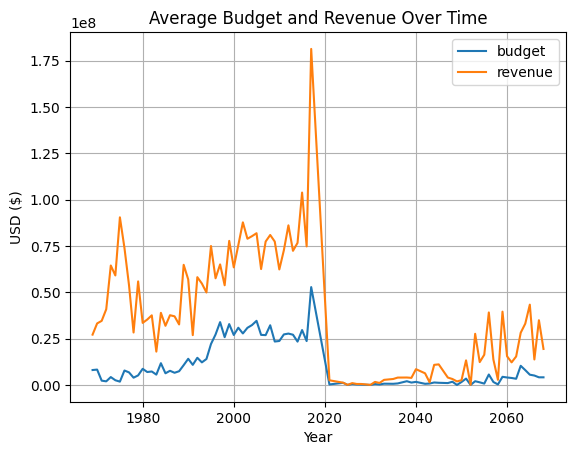

In [43]:
yearly_stats = train_df.groupby('release_year')[['budget', 'revenue']].mean()

plt.figure(figsize=(14,6))
yearly_stats.plot()
plt.title('Average Budget and Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('USD ($)')
plt.grid(True)
plt.show()


### **C. Profit Over Time**

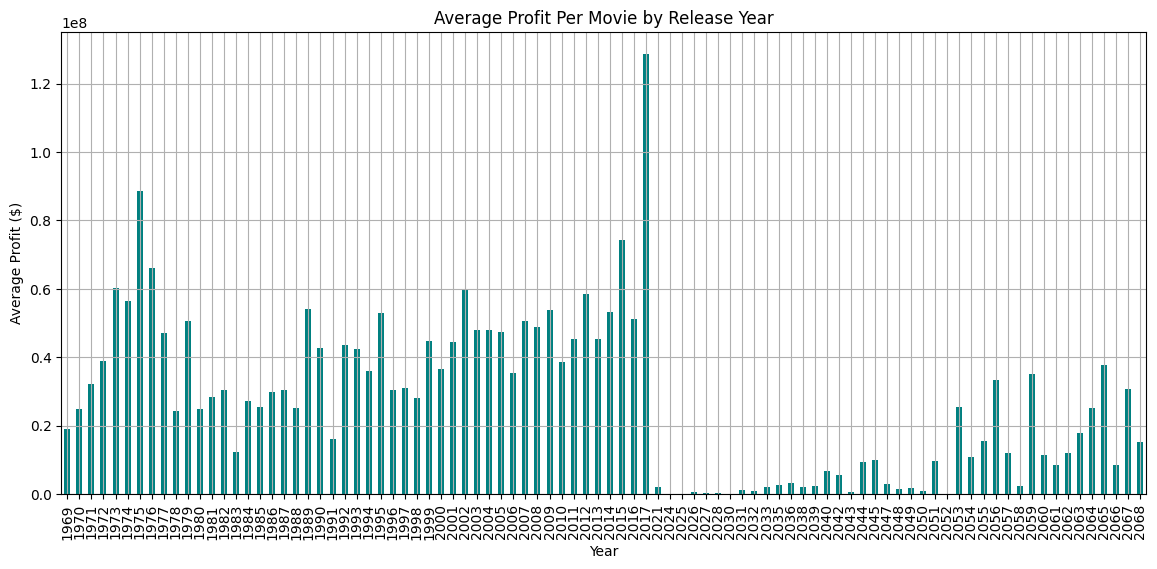

In [44]:
profit_by_year = train_df.groupby('release_year')['profit'].mean()

plt.figure(figsize=(14,6))
profit_by_year.plot(kind='bar', color='teal')
plt.title('Average Profit Per Movie by Release Year')
plt.xlabel('Year')
plt.ylabel('Average Profit ($)')
plt.grid(True)
plt.show()


# **🤖 13. Basic Predictive Modeling (Linear Regression)**

### **A. Prepare the Data**

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Filter rows where budget and revenue are non-zero
model_df = train_df[(train_df['budget'] > 0) & (train_df['revenue'] > 0)]

X = model_df[['budget']]
y = model_df['revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **B. Train and Evaluate the Model**

In [46]:
# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.6114578598172693
RMSE: 115024333.1567421


### **C. Visualize Prediction Results**

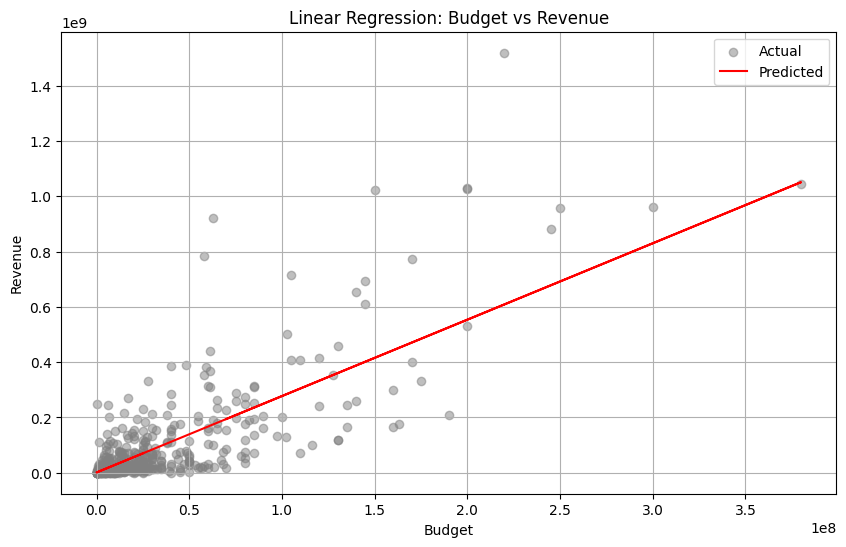

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='gray', alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()


# **14. Select & Prepare Features**

In [48]:
# Filter rows with valid budget and revenue
model_df = train_df[(train_df['budget'] > 0) & (train_df['revenue'] > 0)]

# Select features
features = ['budget', 'popularity', 'runtime', 'release_year']
target = 'revenue'

# Drop rows with missing values in selected columns
model_df = model_df.dropna(subset=features + [target])

# Log-transform budget and revenue to reduce skew
model_df['log_budget'] = np.log1p(model_df['budget'])
model_df['log_revenue'] = np.log1p(model_df['revenue'])

# Final feature set
X = model_df[['log_budget', 'popularity', 'runtime', 'release_year']]
y = model_df['log_revenue']


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)


In [50]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score (log-transformed):", round(r2, 4))
print("RMSE (log-transformed):", round(rmse, 4))


R² Score (log-transformed): 0.5345
RMSE (log-transformed): 1.8198


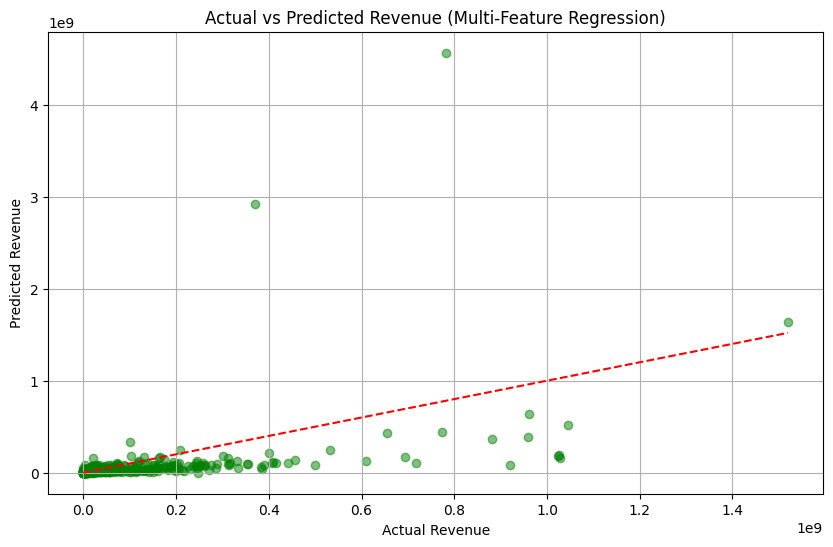

In [51]:
# Convert predictions back from log scale
actual_revenue = np.expm1(y_test)
predicted_revenue = np.expm1(y_pred)

# Plot comparison
plt.figure(figsize=(10,6))
plt.scatter(actual_revenue, predicted_revenue, alpha=0.5, color='green')
plt.plot([actual_revenue.min(), actual_revenue.max()],
         [actual_revenue.min(), actual_revenue.max()],
         color='red', linestyle='--')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue (Multi-Feature Regression)')
plt.grid(True)
plt.show()


# **🌲 15. Random Forest Regressor**

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)

rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("Random Forest R² Score:", round(rf_r2, 4))
print("Random Forest RMSE:", round(rf_rmse, 4))


Random Forest R² Score: 0.6013
Random Forest RMSE: 1.6842


In [54]:
import joblib

# Save both models
joblib.dump(lr_model, 'linear_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [56]:
# Load later if needed
lr_model_loaded = joblib.load('linear_model.pkl')
rf_model_loaded = joblib.load('random_forest_model.pkl')


In [58]:
# Clean test data
test_df['release_date'] = pd.to_datetime(test_df['release_date'], errors='coerce')
test_df['release_year'] = test_df['release_date'].dt.year
test_df['budget'] = test_df['budget'].fillna(0)
test_df['log_budget'] = np.log1p(test_df['budget'])

# Drop rows with missing feature values
X_test_final = test_df[['log_budget', 'popularity', 'runtime', 'release_year']].dropna()

# Predict with Random Forest
revenue_pred_log = rf_model.predict(X_test_final)
revenue_pred = np.expm1(revenue_pred_log)


In [59]:
# Align with sample_submission.csv
submission = sample_df.copy()
submission['revenue'] = 0  # Default zero

# Insert predicted revenues where possible
submission.loc[X_test_final.index, 'revenue'] = revenue_pred

# Save submission
submission.to_csv('submission.csv', index=False)
print("Submission file saved as submission.csv")


Submission file saved as submission.csv


<ipython-input-59-61a929bdcacb>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[6.04580619e+02 1.81675271e+06 6.44179364e+02 ... 3.99024698e+07
 2.01005874e+07 3.03351651e+06]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  submission.loc[X_test_final.index, 'revenue'] = revenue_pred


# **🧪 16. Hyperparameter Tuning for Random Forest**

In [60]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize GridSearch
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error',
    verbose=1
)

# Fit
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

# Evaluate best model
best_pred = best_rf_model.predict(X_test)
best_r2 = r2_score(y_test, best_pred)
best_rmse = np.sqrt(mean_squared_error(y_test, best_pred))

print("Best Parameters:", grid_search.best_params_)
print("Tuned RF R² Score:", round(best_r2, 4))
print("Tuned RF RMSE:", round(best_rmse, 4))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Tuned RF R² Score: 0.6279
Tuned RF RMSE: 1.627


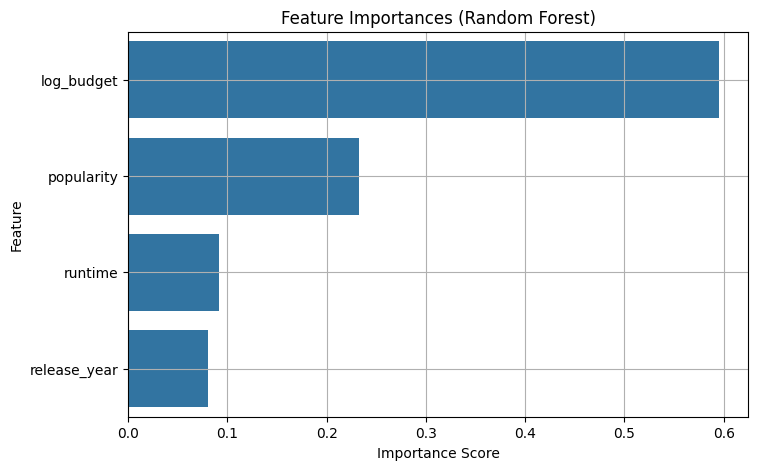

In [61]:
importances = best_rf_model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.show()
